In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from collections import Counter
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv(r'/home/kushal/kushal/Machine-Learning-Projects-master/healthcare-dataset-stroke-data.csv/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.shape

(5110, 12)

In [4]:
data.size

61320

In [5]:
data = data.drop(columns = ['id'],axis =1)

In [6]:
data.shape

(5110, 11)

In [7]:
data.size

56210

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [9]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
data.dropna(inplace = True)

In [11]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
data['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [14]:
data['age'].value_counts()

57.00    93
78.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.08      2
0.48      2
0.40      2
Name: age, Length: 104, dtype: int64

In [15]:
data['hypertension'].value_counts()

0    4458
1     451
Name: hypertension, dtype: int64

In [16]:
data['heart_disease'].value_counts()

0    4666
1     243
Name: heart_disease, dtype: int64

In [17]:
data['ever_married'].value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [18]:
data['work_type'].value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [19]:
data['Residence_type'].value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [20]:
data['avg_glucose_level'].value_counts()

93.88     6
73.00     5
72.49     5
91.85     5
83.16     5
         ..
151.16    1
133.76    1
97.84     1
69.25     1
88.02     1
Name: avg_glucose_level, Length: 3852, dtype: int64

In [21]:
data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64

In [22]:
data['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [23]:
data['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [24]:
corr = data.corr()
corr['stroke'].sort_values(ascending = False)

stroke               1.000000
age                  0.232331
hypertension         0.142515
avg_glucose_level    0.138936
heart_disease        0.137938
bmi                  0.042374
Name: stroke, dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>]], dtype=object)

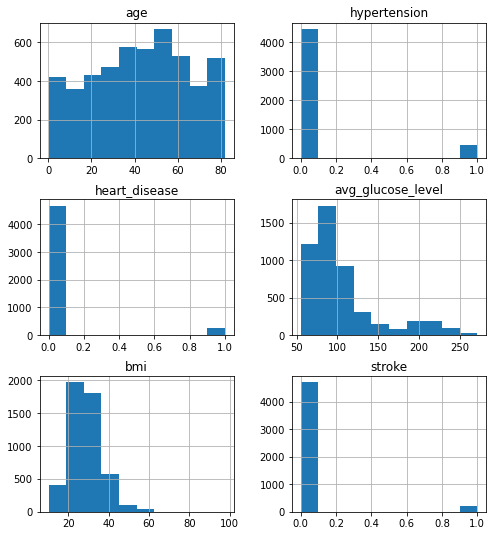

In [25]:
data.hist(figsize=(8,9))

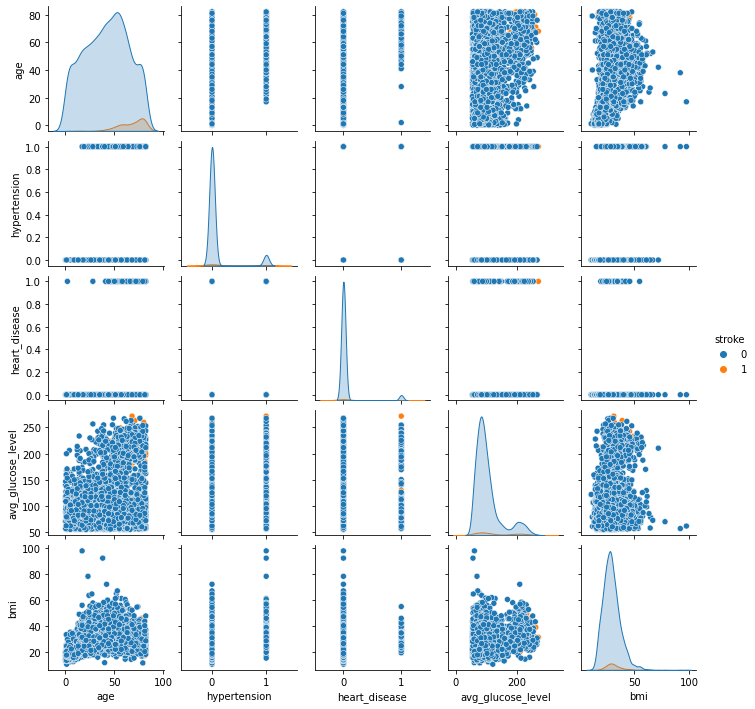

In [26]:
sns.pairplot(data,hue='stroke',size= 2)

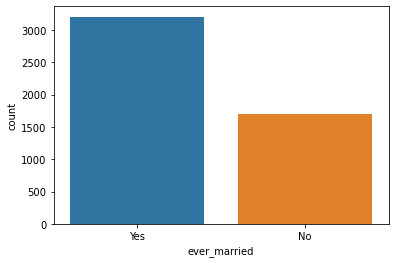

In [27]:
sns.countplot(data['ever_married'])
plt.show()

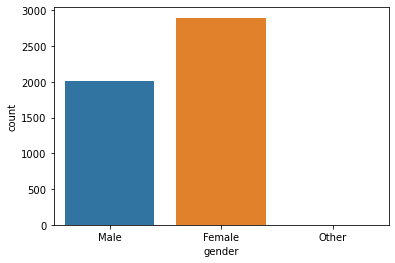

In [28]:
sns.countplot(data['gender'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

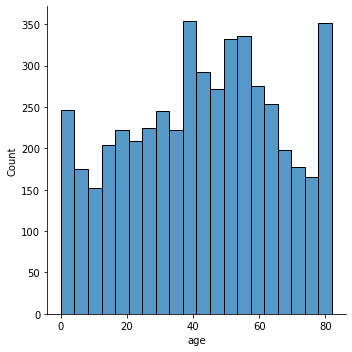

In [29]:
sns.displot(data['age'])
plt.show

<AxesSubplot:xlabel='hypertension', ylabel='stroke'>

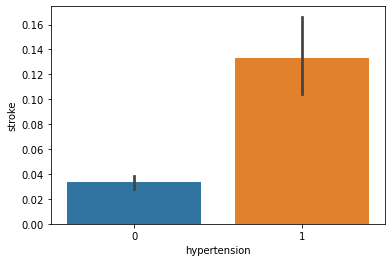

In [30]:
sns.barplot(data['hypertension'],data['stroke'])

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

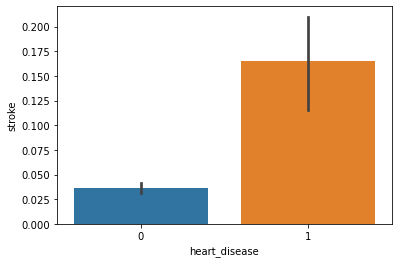

In [31]:
sns.barplot(data['heart_disease'],data['stroke'])

<AxesSubplot:xlabel='ever_married', ylabel='stroke'>

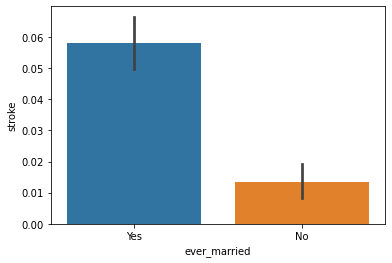

In [32]:
sns.barplot(data['ever_married'],data['stroke'])

<AxesSubplot:xlabel='Residence_type', ylabel='stroke'>

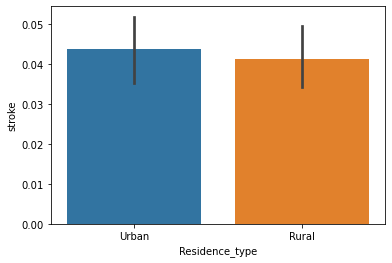

In [33]:
sns.barplot(data['Residence_type'],data['stroke'])

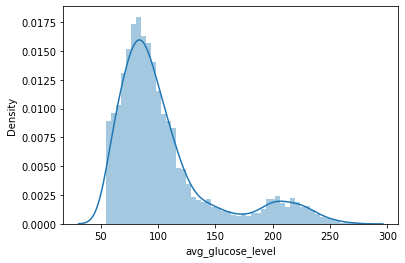

In [34]:
sns.distplot(data['avg_glucose_level'])
plt.show()

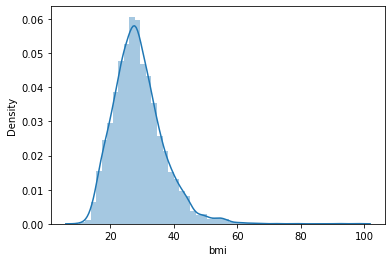

In [35]:
sns.distplot(data['bmi'])
plt.show()

<AxesSubplot:xlabel='smoking_status', ylabel='stroke'>

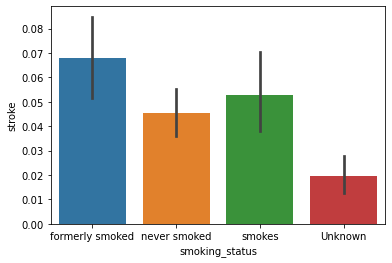

In [36]:
sns.barplot(data['smoking_status'],data['stroke'])

<AxesSubplot:xlabel='hypertension', ylabel='heart_disease'>

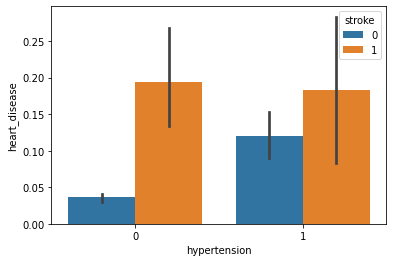

In [37]:
sns.barplot(data['hypertension'],data['heart_disease'],hue=data['stroke'])

<AxesSubplot:xlabel='age', ylabel='gender'>

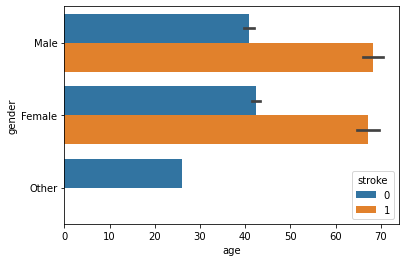

In [38]:
sns.barplot(data['age'],data['gender'],hue=data['stroke'])

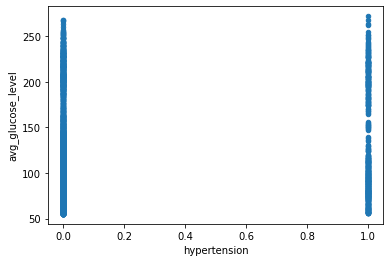

In [39]:
data.plot(x='hypertension',y='avg_glucose_level',kind='scatter')
plt.show()

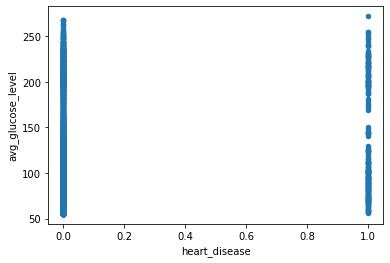

In [40]:
data.plot(x='heart_disease',y='avg_glucose_level',kind='scatter')
plt.show()

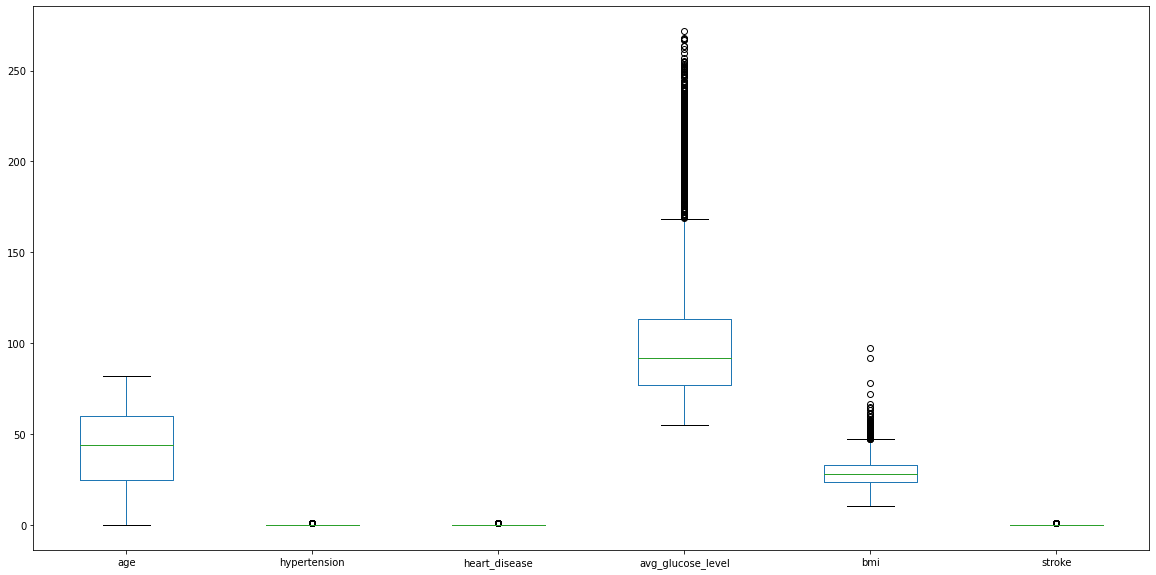

In [41]:
data.plot(kind='box',figsize=(20,10))
plt.show()

<AxesSubplot:>

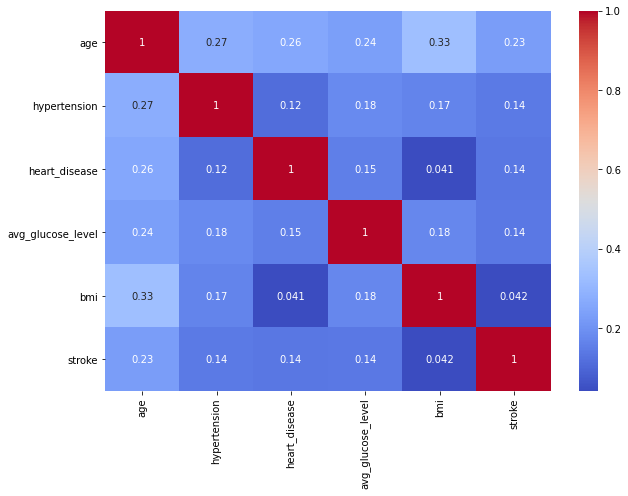

In [42]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [43]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
for x in data:
    if data[x].dtypes =='object':
        data[x] = le.fit_transform(data[x])

In [44]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


In [45]:
x = data.drop(columns = ['stroke'],axis=1)
y = data['stroke']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 13)

In [47]:
x_train.shape

(3436, 10)

In [48]:
x_test.shape

(1473, 10)

In [49]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9572301425661914

In [50]:
y_test

4690    0
1401    0
4650    0
4550    0
3106    0
       ..
2964    0
205     1
1098    0
16      1
3949    0
Name: stroke, Length: 1473, dtype: int64

In [51]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
pd.crosstab(y_test,y_predict)

col_0,0
stroke,
0,1410
1,63


In [53]:
confusion_matrix(y_test,y_predict)

array([[1410,    0],
       [  63,    0]])

In [54]:
precision_score(y_test,y_predict)

0.0

In [55]:
recall_score(y_test,y_predict)

0.0

In [56]:
f1_score(y_test,y_predict)

0.0

In [57]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.00      0.00      0.00        63

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.92      0.96      0.94      1473



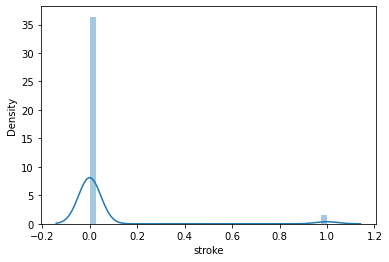

In [58]:
sns.distplot(y_test-y_predict)
plt.show()

In [59]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9226069246435845

In [60]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
pd.crosstab(y_test,y_predict)

col_0,0,1
stroke,,
0,1347,63
1,51,12


In [62]:
confusion_matrix(y_test,y_predict)

array([[1347,   63],
       [  51,   12]])

In [63]:
precision_score(y_test,y_predict)

0.16

In [64]:
recall_score(y_test,y_predict)

0.19047619047619047

In [65]:
f1_score(y_test,y_predict)

0.17391304347826086

In [66]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1410
           1       0.16      0.19      0.17        63

    accuracy                           0.92      1473
   macro avg       0.56      0.57      0.57      1473
weighted avg       0.93      0.92      0.93      1473



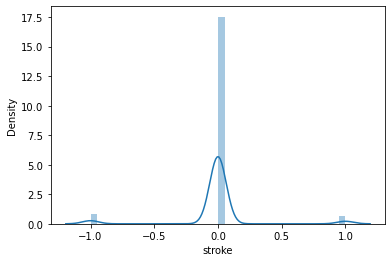

In [67]:
sns.distplot(y_test-y_predict)
plt.show()

In [68]:
model = RandomForestClassifier(random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9558723693143245

In [69]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [70]:
pd.crosstab(y_test,y_predict)

col_0,0,1
stroke,,
0,1408,2
1,63,0


In [71]:
confusion_matrix(y_test,y_predict)

array([[1408,    2],
       [  63,    0]])

In [72]:
precision_score(y_test,y_predict)

0.0

In [73]:
recall_score(y_test,y_predict)

0.0

In [74]:
f1_score(y_test,y_predict)

0.0

In [75]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.00      0.00      0.00        63

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.92      0.96      0.94      1473



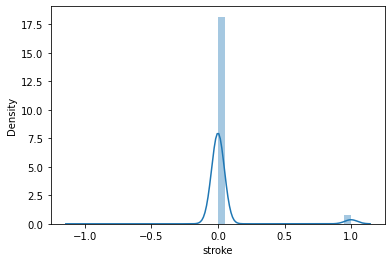

In [76]:
sns.distplot(y_test-y_predict)
plt.show()

In [77]:
model = MLPClassifier(hidden_layer_sizes=(100),random_state=13)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9572301425661914

In [78]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
precision_score(y_test,y_predict)

0.0

In [80]:
recall_score(y_test,y_predict)

0.0

In [81]:
f1_score(y_test,y_predict)

0.0

In [82]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.00      0.00      0.00        63

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.92      0.96      0.94      1473



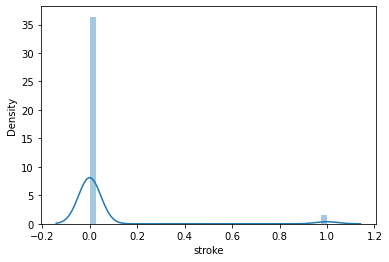

In [83]:
sns.distplot(y_test-y_predict)
plt.show()

In [84]:
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, ..., 1, 0, 0])

In [85]:
pd.crosstab(y_test,y_predict)

col_0,0,1
stroke,,
0,1398,12
1,63,0


In [86]:
confusion_matrix(y_test,y_predict)

array([[1398,   12],
       [  63,    0]])

In [87]:
precision_score(y_test,y_predict)

0.0

In [88]:
recall_score(y_test,y_predict)

0.0

In [89]:
f1_score(y_test,y_predict)

0.0

In [90]:
y_predict = model.predict(x_test)

In [91]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[1398   12]
 [  63    0]]


<AxesSubplot:>

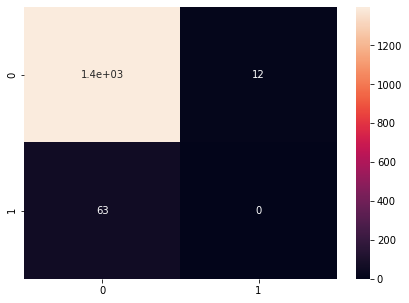

In [92]:
plt.figure(figsize = (7,5))
sns.heatmap(matrix,annot=True)

In [93]:
print('accuracy:',accuracy_score(y_test,y_predict))

accuracy: 0.9490835030549898


In [94]:
# XGBClassifier
model =XGBClassifier(learning_rate = 0.1,random_state=13,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9538357094365241

In [95]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
pd.crosstab(y_test,y_predict)

col_0,0,1
stroke,,
0,1403,7
1,61,2


In [97]:
confusion_matrix(y_test,y_predict)

array([[1403,    7],
       [  61,    2]])

In [98]:
precision_score(y_test,y_predict)

0.2222222222222222

In [99]:
recall_score(y_test,y_predict)

0.031746031746031744

In [100]:
f1_score(y_test,y_predict)

0.05555555555555555

In [101]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.22      0.03      0.06        63

    accuracy                           0.95      1473
   macro avg       0.59      0.51      0.52      1473
weighted avg       0.93      0.95      0.94      1473



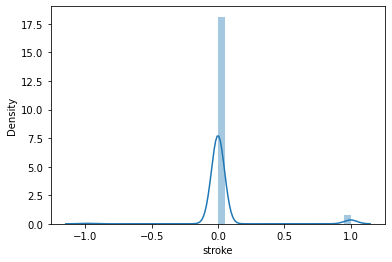

In [102]:
sns.distplot(y_test-y_predict)
plt.show()

In [103]:
model = SVC(gamma=0.01,kernel='rbf')
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9572301425661914

In [104]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
pd.crosstab(y_test,y_predict)

col_0,0
stroke,
0,1410
1,63


In [106]:
confusion_matrix(y_test,y_predict)

array([[1410,    0],
       [  63,    0]])

In [107]:
precision_score(y_test,y_predict)

0.0

In [108]:
recall_score(y_test,y_predict)

0.0

In [109]:
f1_score(y_test,y_predict)

0.0

In [110]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1410
           1       0.00      0.00      0.00        63

    accuracy                           0.96      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.92      0.96      0.94      1473



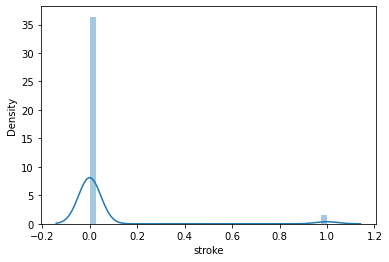

In [111]:
sns.distplot(y_test-y_predict)
plt.show()

In [112]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict)

Counter({0: 1410, 1: 63})


col_0,0
stroke,
0,1410
1,63


In [113]:
pca = PCA()
x = pd.DataFrame(pca.fit_transform(x))

In [114]:
x.head()

,0,1,2,3,4,5,6,7,8,9
0,125.837241,-4.851351,2.645815,-0.741151,0.322358,-0.456630,0.578419,0.005919,-0.237542,0.830037
1,6.549465,-36.728075,-0.906718,-0.258333,-0.469204,0.575793,0.604939,0.196439,-0.211965,0.828888
2,66.230358,3.844965,3.649832,1.124757,-0.967167,-0.522241,-0.371480,-0.219668,-0.165796,-0.047469
3,73.402798,-23.859045,-10.387128,-0.475515,-1.092313,0.475618,-0.490622,0.109419,0.726151,-0.219160
4,85.826534,-24.469888,-5.868485,-0.775139,0.301175,-0.449603,0.564090,0.069633,-0.286618,-0.202007


In [115]:
pca.explained_variance_ratio_

array([7.90390068e-01, 1.87503530e-01, 2.10305885e-02, 4.79761413e-04,
       3.11964996e-04, 9.81392850e-05, 9.43413475e-05, 4.56348145e-05,
       2.93358720e-05, 1.66357283e-05])

In [116]:
pca.explained_variance_ratio_

array([7.90390068e-01, 1.87503530e-01, 2.10305885e-02, 4.79761413e-04,
       3.11964996e-04, 9.81392850e-05, 9.43413475e-05, 4.56348145e-05,
       2.93358720e-05, 1.66357283e-05])

<AxesSubplot:>

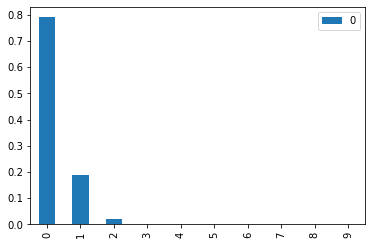

In [117]:
covid_var = pd.DataFrame(pca.explained_variance_ratio_)
covid_var.plot(kind = 'bar')

In [118]:
pca.explained_variance_ratio_[0:-1].sum()

0.9999833642716507

In [119]:
x = x.iloc[:,:-1]
x.head(5)

,0,1,2,3,4,5,6,7,8
0,125.837241,-4.851351,2.645815,-0.741151,0.322358,-0.456630,0.578419,0.005919,-0.237542
1,6.549465,-36.728075,-0.906718,-0.258333,-0.469204,0.575793,0.604939,0.196439,-0.211965
2,66.230358,3.844965,3.649832,1.124757,-0.967167,-0.522241,-0.371480,-0.219668,-0.165796
3,73.402798,-23.859045,-10.387128,-0.475515,-1.092313,0.475618,-0.490622,0.109419,0.726151
4,85.826534,-24.469888,-5.868485,-0.775139,0.301175,-0.449603,0.564090,0.069633,-0.286618


In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.04276985743380855
MSE: 0.04276985743380855
RMSE: 0.20680874602832577


In [121]:
0.20680874602832577/(max(y)-min(y))

0.20680874602832577

In [122]:
metrics.accuracy_score(y_test, y_predict)

0.9572301425661914

In [123]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "MPL":MLPClassifier(),
          "XGB": XGBClassifier(),
          "SVM": SVC()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [124]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.9572301425661914,
 'Random Forest': 0.9558723693143245,
 'DecisionTree': 0.9171758316361168,
 'KNN': 0.9490835030549898,
 'MPL': 0.9572301425661914,
 'XGB': 0.9463679565512559,
 'SVM': 0.9572301425661914}

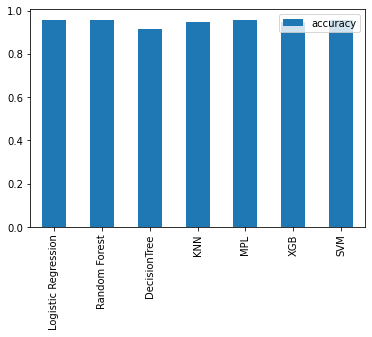

In [125]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();